In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/content/drive/MyDrive/PY/TimeSeriesRecSys/Data_HetRec/user_taggedmovies.dat',sep="\s+", )
df

userID  movieID  tagID  ...  date_hour  date_minute  date_second
0          75      353   5290  ...         23           20           15
1          78     4223   5264  ...          4           43           45
2         127     1343   1544  ...          3           42           27
3         127     1343  12330  ...          3           42           27
4         127     2080   1451  ...          3           42           47
...       ...      ...    ...  ...        ...          ...          ...
47952   71534     7937    306  ...          3            7           14
47953   71534     8848    331  ...          3            6           19
47954   71534     8848    427  ...          3            6           27
47955   71534    25833   7671  ...          3            7           31
47956   71534    30701    243  ...          3            4           32

[47957 rows x 9 columns]

In [ ]:
df.iloc[:,:3]

userID  movieID  tagID
0          75      353   5290
1          78     4223   5264
2         127     1343   1544
3         127     1343  12330
4         127     2080   1451
...       ...      ...    ...
47952   71534     7937    306
47953   71534     8848    331
47954   71534     8848    427
47955   71534    25833   7671
47956   71534    30701    243

[47957 rows x 3 columns]

In [ ]:
df.loc[:,'timestamps'] = df.date_year.astype('str')+'_'+ df.date_month.astype('str')+'_'+ df.date_day.astype('str')+'_'+ \
df.date_hour.astype('str')+'_'+df.date_minute.astype('str')+'_'+df.date_second.astype('str')

df.loc[:,'timestamps'] = df.loc[:,'timestamps'].apply(pd.to_datetime,format='%Y_%m_%d_%H_%M_%S')
df['dayofweek_num']=df['timestamps'].dt.dayofweek  
df['weekofyear']=df['timestamps'].dt.weekofyear
df['quarter']=df['timestamps'].dt.quarter
df['days_in_month']=df['timestamps'].dt.days_in_month
df['is_month_start']=df['timestamps'].dt.is_month_start
df['is_month_end']=df['timestamps'].dt.is_month_end
df['is_quarter_start']=df['timestamps'].dt.is_quarter_start
df['is_quarter_end']=df['timestamps'].dt.is_quarter_end
df['is_year_start']=df['timestamps'].dt.is_year_start
df['is_year_end']=df['timestamps'].dt.is_year_end
df['is_leap_year']=df['timestamps'].dt.is_leap_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
df

userID  movieID  tagID  ...  is_year_start  is_year_end  is_leap_year
0          75      353   5290  ...          False        False         False
1          78     4223   5264  ...          False        False         False
2         127     1343   1544  ...          False        False         False
3         127     1343  12330  ...          False        False         False
4         127     2080   1451  ...          False        False         False
...       ...      ...    ...  ...            ...          ...           ...
47952   71534     7937    306  ...          False        False         False
47953   71534     8848    331  ...          False        False         False
47954   71534     8848    427  ...          False        False         False
47955   71534    25833   7671  ...          False        False         False
47956   71534    30701    243  ...          False        False         False

[47957 rows x 21 columns]

In [ ]:
# SimHash

# PCA

## Original time-series data pca

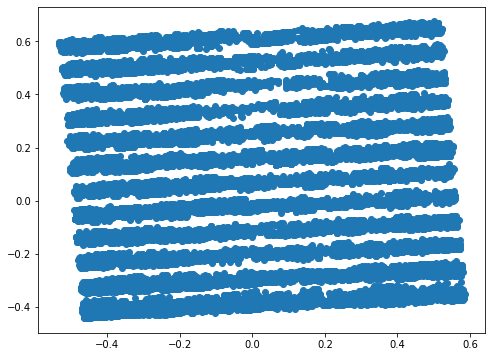

In [ ]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,3:9]
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

## New time data pca

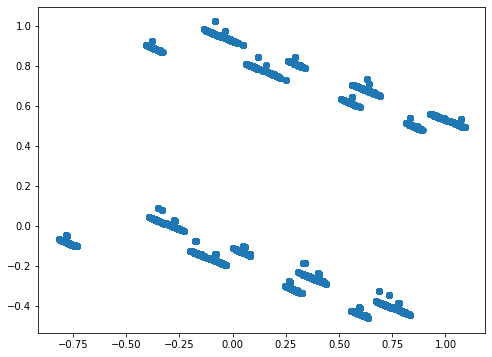

In [ ]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,9:]
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

## All time data pca
(attributes manually added)

In [ ]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,3:]
cols = df_selected.columns
df_selected

date_day  date_month  ...  is_year_end  is_leap_year
0            29          10  ...        False         False
1            16           4  ...        False         False
2            28           8  ...        False         False
3            28           8  ...        False         False
4            28           8  ...        False         False
...         ...         ...  ...          ...           ...
47952         3          12  ...        False         False
47953         3          12  ...        False         False
47954         3          12  ...        False         False
47955         3          12  ...        False         False
47956         3          12  ...        False         False

[47957 rows x 17 columns]

In [ ]:
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
# scaler.inverse_transform(df_selected)

vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1]) # user

### PCA result analysis

In [ ]:
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(df_selected)
df_selected = scaler.transform(df_selected)    

pca = PCA()
x_new = pca.fit_transform(df_selected)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) # c = y 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
# plt.xlim(-1,1)
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.30573866, 0.13857541])

In [ ]:
pca.components_

array([[ 1.07091652e-02,  5.12812900e-01,  4.71044614e-02,
         1.93923310e-02,  9.73887963e-04, -5.23078471e-04,
        -2.80068987e-02,  4.75152141e-01,  6.00944295e-01,
         3.40918063e-01,  1.09310664e-02,  1.02166365e-02,
         5.59405946e-03,  5.04748078e-03, -3.67042788e-03,
         4.77088891e-03,  1.73442040e-01],
       [-2.97427789e-03, -1.40894918e-01,  3.60125459e-01,
         1.20489254e-01, -2.30357049e-02, -2.85427435e-03,
        -1.08611523e-02, -1.29245532e-01, -1.53473176e-01,
         1.58099275e-01,  2.77193602e-02,  2.35685866e-03,
         2.29400846e-02, -4.67052443e-03,  8.18319096e-03,
        -3.67424796e-03,  8.76709055e-01]])

In [ ]:
pca.components_

array([[ 1.07091652e-02,  5.12812900e-01,  4.71044614e-02,
         1.93923310e-02,  9.73887963e-04, -5.23078471e-04,
        -2.80068987e-02,  4.75152141e-01,  6.00944295e-01,
         3.40918063e-01,  1.09310664e-02,  1.02166365e-02,
         5.59405946e-03,  5.04748078e-03, -3.67042788e-03,
         4.77088891e-03,  1.73442040e-01],
       [-2.97427789e-03, -1.40894918e-01,  3.60125459e-01,
         1.20489254e-01, -2.30357049e-02, -2.85427435e-03,
        -1.08611523e-02, -1.29245532e-01, -1.53473176e-01,
         1.58099275e-01,  2.77193602e-02,  2.35685866e-03,
         2.29400846e-02, -4.67052443e-03,  8.18319096e-03,
        -3.67424796e-03,  8.76709055e-01]])

In [ ]:
# get the most important features on the PCs 
n_pcs= pca.components_.shape[0] # 2

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = cols
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_pca = pd.DataFrame(dic.items())
df_pca

0                 1
0    PC0           quarter
1    PC1      is_leap_year
2    PC2         date_hour
3    PC3     dayofweek_num
4    PC4     days_in_month
5    PC5       date_minute
6    PC6       date_second
7    PC7          date_day
8    PC8    is_month_start
9    PC9      is_month_end
10  PC10         date_year
11  PC11  is_quarter_start
12  PC12    is_quarter_end
13  PC13           quarter
14  PC14     is_year_start
15  PC15    is_quarter_end
16  PC16       is_year_end

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (20, 15)

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
# plt.title('K-means clustering on the TSFresh Features (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()


In [ ]:
# df_selected = pd.DataFrame(df_selected)
# df_selected.columns = cols
# df_selected['cluster'] = label_pred
# df_selected = pd.concat([df.iloc[:,:3],df_selected], axis=1)
# df_selected.head()

userID  movieID  tagID  ...  is_year_end  is_leap_year  cluster
0      75      353   5290  ...          0.0           0.0       18
1      78     4223   5264  ...          0.0           0.0       13
2     127     1343   1544  ...          0.0           0.0       22
3     127     1343  12330  ...          0.0           0.0       22
4     127     2080   1451  ...          0.0           0.0       22

[5 rows x 21 columns]

In [ ]:
# tagging behaviour
df_tagging = pd.concat([df.iloc[:,:3],pd.Series(label_pred)], axis=1)
df_tagging = df_tagging.rename(columns={0:'cluster'})

In [ ]:
# user center
df_userC = df_tagging.groupby(['userID','cluster'])[['movieID']].count()
df_userC = df_userC.rename(columns={'movieID':'count'})
df_userC = df_userC.reset_index().sort_values(by=['userID','count'], ascending=[True,False])

In [ ]:
df_userC[df_userC.userID==71509] # movieID is the frequency of cluster apearing in a user's tagging behaviour

userID  cluster  count
3738   71509       21    111
3736   71509        8     14
3737   71509       18      2
3739   71509       22      1

In [ ]:
df_userC_Top = pd.DataFrame(df_userC.groupby('userID').apply(lambda x: x['cluster'][:3])).reset_index() # MAX 3 clusters orig 3743-> 2933 (Top3)
del df_userC_Top['level_1']
df_userC_Top

userID  cluster
0         75       18
1         78       13
2        127       22
3        170       10
4        175       18
...      ...      ...
2928   71509        8
2929   71509       18
2930   71525        6
2931   71529       10
2932   71534        5

[2933 rows x 2 columns]

In [ ]:
# iI item cluster- item
df_itemC = df_tagging.groupby(['movieID','cluster'])[['userID']].count()
df_itemC = df_itemC.rename(columns={'userID':'count'})
df_itemC = df_itemC.reset_index().sort_values(by=['movieID','count'], ascending=[True,False])
df_itemC_Top = pd.DataFrame(df_itemC.groupby('movieID').apply(lambda x: x['cluster'][:3])).reset_index() # (Top3)
del df_itemC_Top['level_1']
df_itemC_Top

movieID  cluster
0            1        0
1            1        1
2            1       24
3            2       14
4            2       24
...        ...      ...
12612    64993        9
12613    65006       16
12614    65037        9
12615    65126        9
12616    65130        9

[12617 rows x 2 columns]

In [ ]:
# tT tag cluster- Tag
df_tagC = df_tagging.groupby(['tagID','cluster'])[['userID']].count()
df_tagC = df_tagC.rename(columns={'userID':'count'})
df_tagC = df_tagC.reset_index().sort_values(by=['tagID','count'], ascending=[True,False])
df_tagC_Top = pd.DataFrame(df_tagC.groupby('tagID').apply(lambda x: x['cluster'][:3])).reset_index() # (Top3)
del df_tagC_Top['level_1']
df_tagC_Top

tagID  cluster
0          1       21
1          2        6
2          2        0
3          2        4
4          3       16
...      ...      ...
14242  16521       24
14243  16522       24
14244  16527       20
14245  16528       19
14246  16529       19

[14247 rows x 2 columns]

In [ ]:
res_output = {'cU':{},'cI':{},'cT':{}}
for i,v in df_userC_Top.groupby('cluster').apply(lambda x: list([f'U-{i}' for i in x['userID']])).items():
  res_output['cU'][f'c-{i}'] = v

for i,v in df_itemC_Top.groupby('cluster').apply(lambda x: list([f'I-{i}' for i in x['movieID']])).items():
  res_output['cI'][f'c-{i}'] = v

for i,v in df_tagC_Top.groupby('cluster').apply(lambda x: list([f'T-{i}' for i in x['tagID']])).items():
  res_output['cT'][f'c-{i}'] = v

In [ ]:
res_output = {'Uc':{},'Ic':{},'Tc':{}}
for i,v in df_userC_Top.groupby('userID').apply(lambda x: list([f'c-{i}' for i in x['cluster']])).items():
  res_output['Uc'][f'U-{i}'] = v

for i,v in df_itemC_Top.groupby('movieID').apply(lambda x: list([f'c-{i}' for i in x['cluster']])).items():
  res_output['Ic'][f'I-{i}'] = v

for i,v in df_tagC_Top.groupby('tagID').apply(lambda x: list([f'c-{i}' for i in x['cluster']])).items():
  res_output['Tc'][f'T-{i}'] = v

In [ ]:
import json
jsonString = json.dumps(res_output)
# jsonFile = open("/content/drive/MyDrive/PY/TimeSeriesRecSys/Data_HetRec/taggingKmeansVote_cU_cI_cT_Top3.json", "w")
jsonFile = open("/content/drive/MyDrive/PY/TimeSeriesRecSys/Data_HetRec/taggingKmeansVote_Uc_Ic_Tc_Top3.json", "w")

jsonFile.write(jsonString)
jsonFile.close()

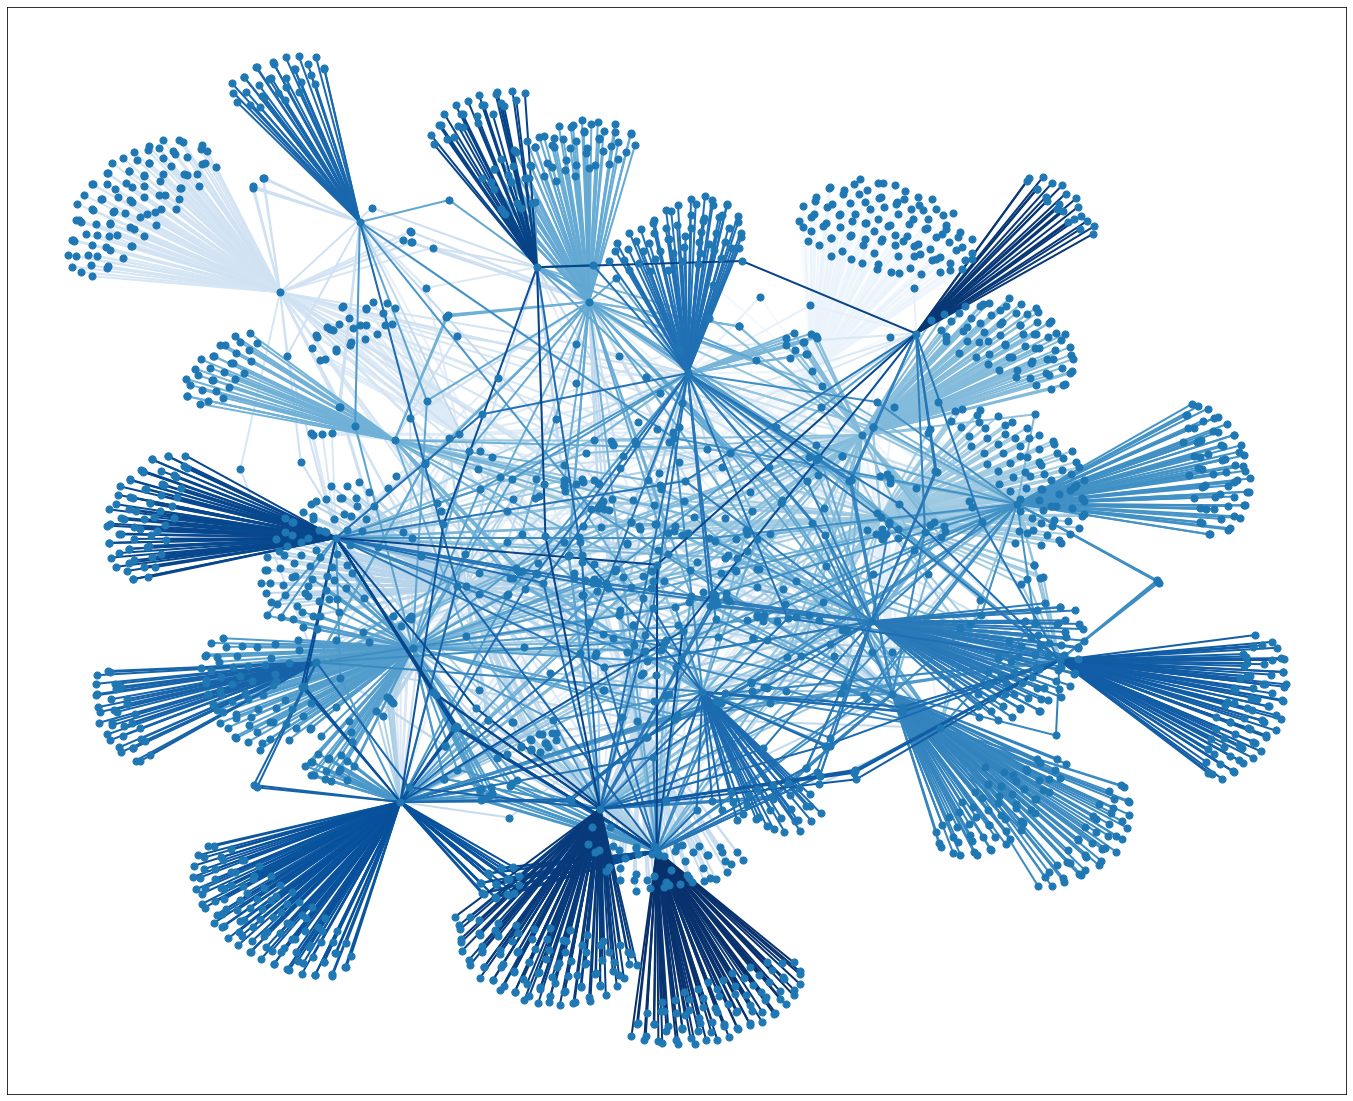

2933


In [ ]:
# tagging behaviour center - user
import matplotlib.pyplot as plt
import networkx as nx
import random
random.seed(0)        
np.random.seed(0)
G = nx.Graph()

for c in res_output['cU']:
    for u in res_output['cU'][c]:
        G.add_edge(c, u)

plt.rcParams["figure.figsize"] = (24, 20)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos,node_size=50)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
# labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

In [ ]:
# only show random 100 tagging center -user
random.seed(0)        
np.random.seed(0)
G = nx.Graph()
df_userC_1k = df_userC.sample(100, random_state=0)
for i in range(len(df_userC_1k)):
    G.add_edge(f'U-{df_userC_1k.iloc[i,0]}', f'c-{df_userC_1k.iloc[i,1]}', weights= df_userC_1k.iloc[i,2])

plt.rcParams["figure.figsize"] = (20, 15)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos,  node_size=50)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=10)
plt.show()
print(M)

100


In [ ]:
G.edges

EdgeView([('U-14895', 'c-5'), ('U-14895', 'c-13'), ('c-5', 'I-4754'), ('c-5', 'I-6852'), ('c-5', 'U-41838'), ('c-5', 'T-7455'), ('c-5', 'U-39689'), ('c-5', 'I-1007'), ('c-5', 'T-7109'), ('c-5', 'T-2393'), ('c-5', 'I-46948'), ('c-5', 'I-3013'), ('c-5', 'I-2019'), ('c-5', 'I-3032'), ('c-5', 'I-2785'), ('c-5', 'I-4532'), ('c-5', 'U-57973'), ('c-5', 'U-24072'), ('c-5', 'U-36784'), ('c-5', 'I-1251'), ('c-5', 'I-905'), ('c-5', 'T-15744'), ('c-5', 'U-56620'), ('c-5', 'I-8884'), ('c-5', 'U-55865'), ('c-5', 'I-8814'), ('c-5', 'U-4022'), ('c-5', 'T-10422'), ('c-5', 'I-6333'), ('c-5', 'U-12025'), ('c-5', 'I-6039'), ('c-5', 'U-17312'), ('c-5', 'U-18983'), ('c-5', 'I-5797'), ('c-5', 'I-2083'), ('c-5', 'I-2052'), ('c-5', 'U-2658'), ('c-5', 'T-2809'), ('c-5', 'T-2805'), ('c-5', 'T-9941'), ('c-5', 'U-41178'), ('c-5', 'U-45286'), ('c-5', 'U-8610'), ('c-5', 'T-220'), ('c-5', 'I-2144'), ('c-5', 'T-1123'), ('c-5', 'T-21'), ('c-5', 'I-364'), ('c-5', 'T-2406'), ('c-5', 'I-3606'), ('c-5', 'U-69341'), ('c-5',

In [ ]:
# tagging behaviour centers - user / item / tag
random.seed(0)        
np.random.seed(0)
G = nx.Graph()

k = 500
df_userC_1k = df_userC.sample(k, random_state=0)
df_itemC_1k = df_itemC.sample(k, random_state=0)
df_tagC_1k = df_tagC.sample(k, random_state=0)
for i in range(k):
    G.add_edge(f'U-{df_userC_1k.iloc[i,0]}', f'c-{df_userC_1k.iloc[i,1]}', weights= df_userC_1k.iloc[i,2])
    G.add_edge(f'I-{df_itemC_1k.iloc[i,0]}', f'c-{df_itemC_1k.iloc[i,1]}', weights= df_userC_1k.iloc[i,2])
    G.add_edge(f'T-{df_tagC_1k.iloc[i,0]}', f'c-{df_tagC_1k.iloc[i,1]}', weights= df_userC_1k.iloc[i,2])

plt.rcParams["figure.figsize"] = (24, 20)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos,  node_size=40, )
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=7)
plt.show()
print(M)

1500


### Group by User

In [ ]:
df_selected = df.filter(regex="[^time_stamp]").iloc[:,3:] # all temporal data
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = df.filter(regex="[^time_stamp]").iloc[:,3:].columns
df_selected = pd.concat([df.iloc[:,:3],df_selected], axis=1)

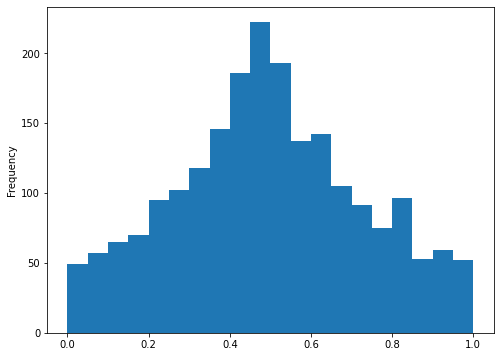

In [ ]:
df_selected.groupby('userID').apply(lambda x: x['date_second'].median()).plot.hist(bins=20)

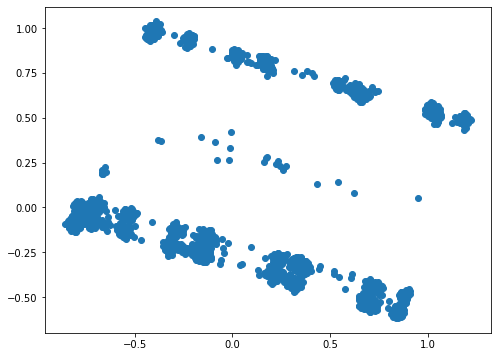

In [ ]:
df_user = df_selected.groupby('userID').median().iloc[:,2:] # mean 
# df_user = df_selected.groupby('userID').mean().iloc[:,2:]

pca = PCA(n_components=2)
vectors = pca.fit_transform(df_user) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

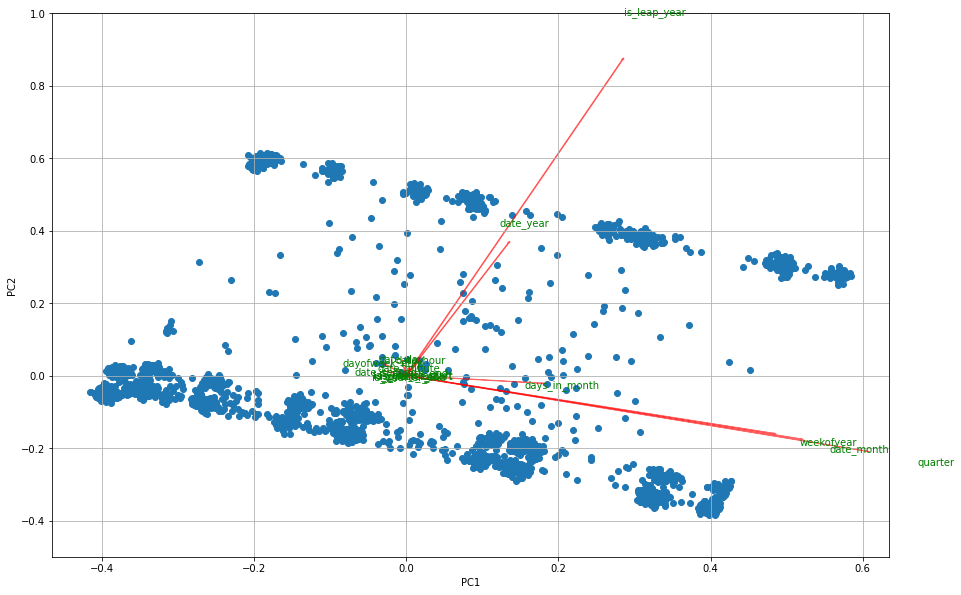

0             1
0  PC0       quarter
1  PC1  is_leap_year

In [ ]:
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

getdf_pca()

In [ ]:
pd.Series(label_pred).value_counts()

3     227
8     171
15    144
14    138
19    123
1     122
12    121
17    118
13    113
2     104
23     88
22     75
10     74
0      74
9      65
7      64
20     53
4      53
16     45
18     42
5      40
6      39
11      9
24      8
21      3
dtype: int64

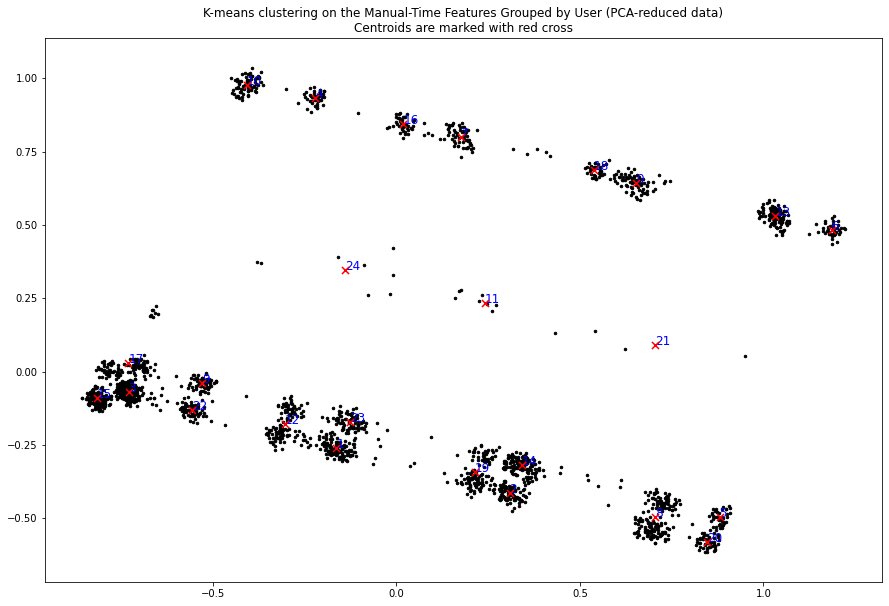

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (15, 10)


plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by User (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [ ]:
df_user['cluster'] = label_pred
df_user

date_day  date_month  date_year  ...  is_year_end  is_leap_year  cluster
userID                                   ...                                    
75      0.933333    0.818182       0.25  ...          0.0           0.0        8
78      0.500000    0.272727       0.50  ...          0.0           0.0       12
127     0.900000    0.636364       0.50  ...          0.0           0.0       14
170     0.966667    0.818182       0.25  ...          0.0           0.0        8
175     0.816667    0.727273       0.50  ...          0.0           0.0       14
...          ...         ...        ...  ...          ...           ...      ...
71497   0.900000    0.636364       0.50  ...          0.0           0.0       14
71509   0.000000    0.545455       0.75  ...          0.0           1.0       18
71525   0.333333    0.454545       0.25  ...          0.0           0.0        1
71529   0.933333    0.818182       0.25  ...          0.0           0.0        8
71534   0.066667    1.000000       0.50  ...          0.0           0.0        5

[2113 rows x 18 columns]

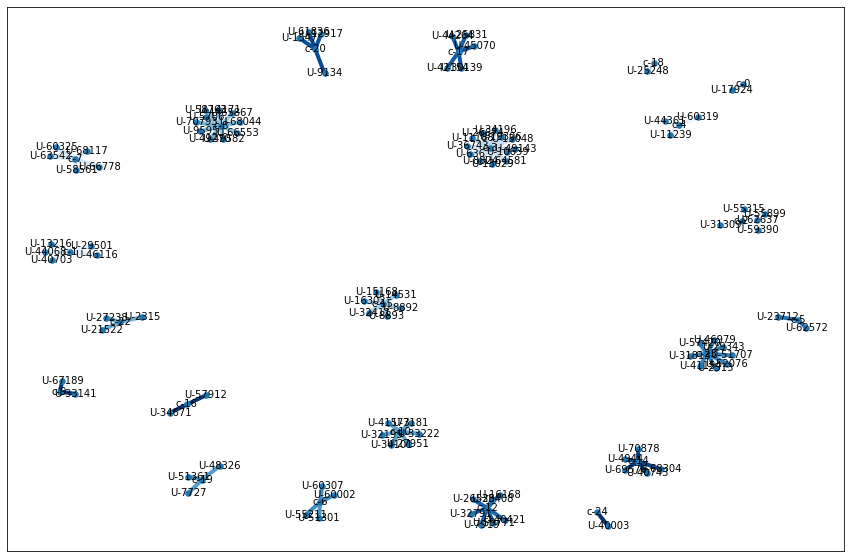

100


In [ ]:
# user center - user
random.seed(0)        
np.random.seed(0)
G = nx.Graph()

for k,v in df_user.iloc[:,-1].sample(100, random_state=0).items():
    G.add_edge(f'U-{k}', f'c-{v}')

plt.rcParams["figure.figsize"] = (15, 10)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos,  node_size=30 )
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=4)
labels = nx.draw_networkx_labels(G,pos, font_size=10)
plt.show()
print(M)

In [ ]:
res_output = {'uU':{},'iI':{},'tT':{}}

for i,v in df_user.groupby('cluster').apply(lambda x: list([f'U-{i}' for i in x.index])).items():
  res_output['uU'][f'u-{i}'] = v

In [ ]:
res_output = {'Uu':{},'Ii':{},'Tt':{}}

for i in df_user.index:
  res_output['Uu'][f'U-{i}'] = [f"u-{df_user.loc[i,'cluster']}"]

### Group by Item

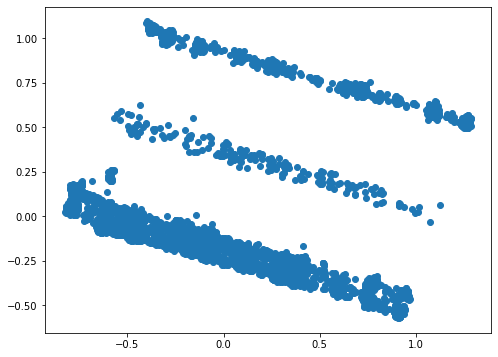

In [ ]:
df_movie = df_selected.groupby('movieID').median().iloc[:,2:] # mean 

pca = PCA(n_components=2)
vectors = pca.fit_transform(df_movie) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

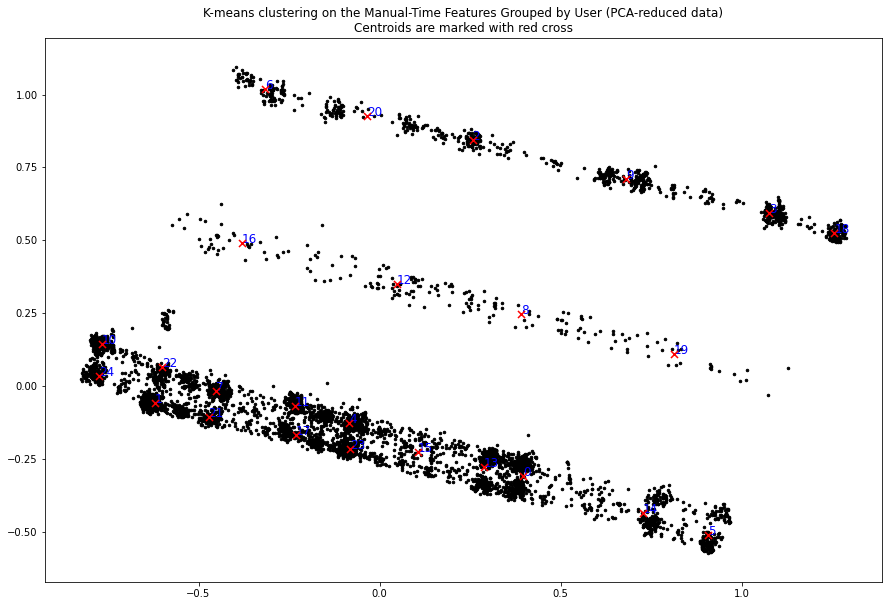

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (15, 10)


plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by User (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [ ]:
df_movie['cluster'] = label_pred


In [ ]:
for i,v in df_movie.groupby('cluster').apply(lambda x: list([f'I-{n}' for n in x.index])).items():
  res_output['iI'][f'i-{i}'] = v

In [ ]:
for i in df_movie.index:
  res_output['Ii'][f'I-{i}'] = [f"i-{df_movie.loc[i,'cluster']}"]

### Group by Tag

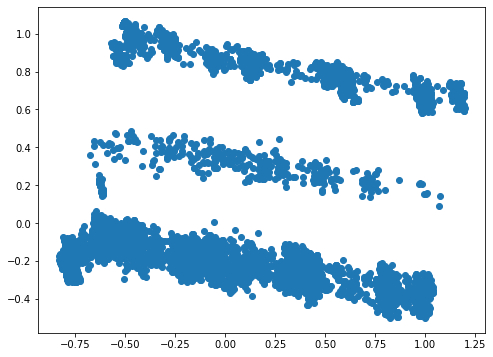

In [ ]:
df_tag = df_selected.groupby('tagID').median().iloc[:,2:] # mean 

pca = PCA(n_components=2)
vectors = pca.fit_transform(df_tag) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

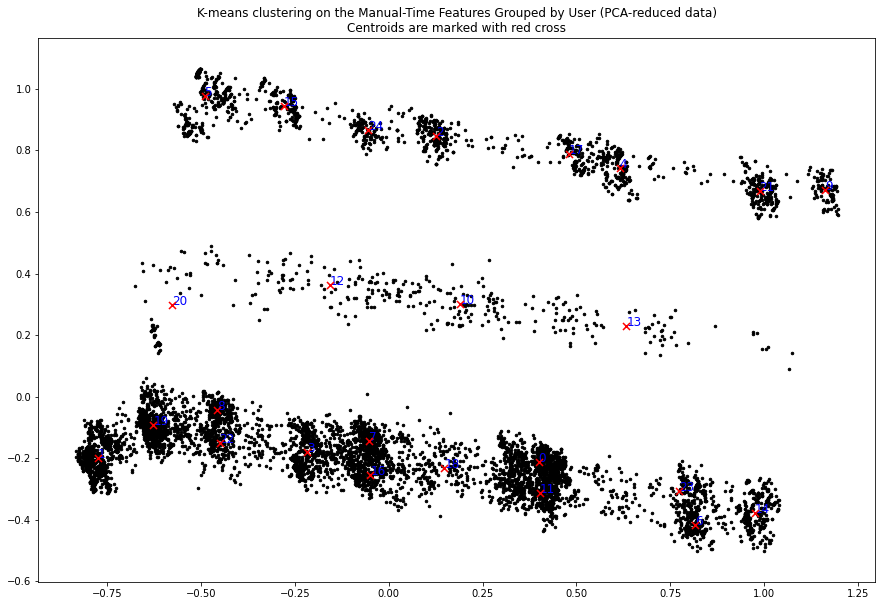

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (15, 10)


plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by User (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [ ]:
df_tag['cluster'] = label_pred


In [ ]:
for i,v in df_tag.groupby('cluster').apply(lambda x: list([f'T-{i}' for i in x.index])).items():
  res_output['tT'][f't-{i}'] = v

In [ ]:
for i in df_tag.index:
  res_output['Tt'][f'T-{i}'] = [f"t-{df_tag.loc[i,'cluster']}"]

In [ ]:
import json
jsonString = json.dumps(res_output)
jsonFile = open("/content/drive/MyDrive/PY/TimeSeriesRecSys/Data_HetRec/MediGroupKmeans_Uu_Ii_Tt_Top1.json", "w")
jsonFile.write(jsonString)
jsonFile.close()

## Only tagging data pca

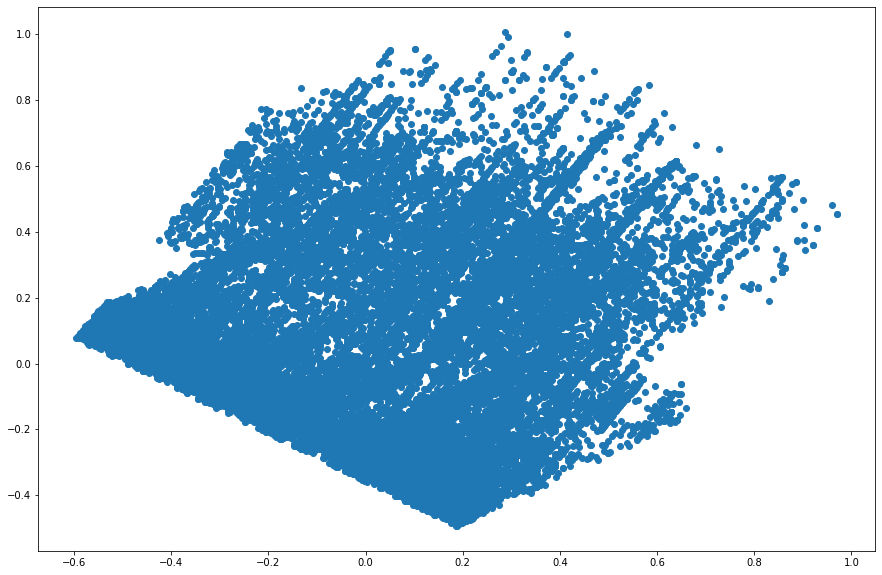

In [ ]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,:3]
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(vectors[:,0],vectors[:,1])

## Tagging + original time data pca

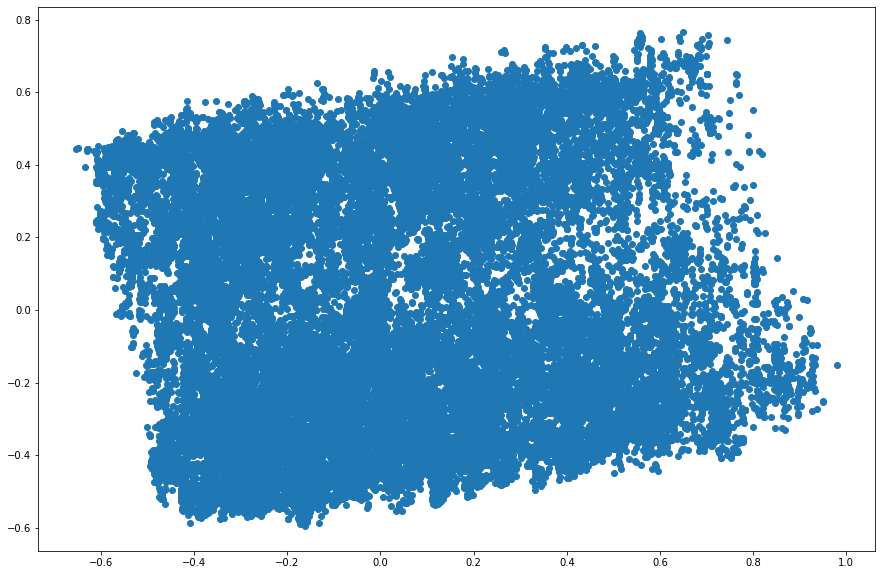

In [ ]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,:9]
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(vectors[:,0],vectors[:,1])

## Tagging + new time-series data pca

In [ ]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = pd.concat([df_selected.iloc[:,:3],df_selected.iloc[:,9:]],axis=1)
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

## Tagging + all time-series data pca

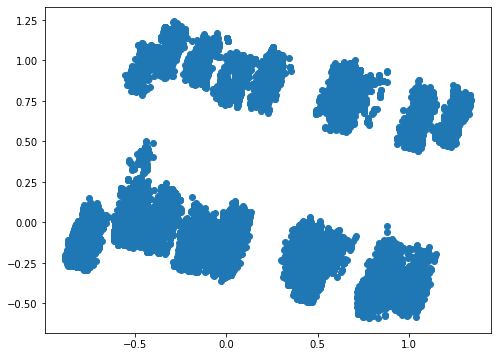

In [ ]:
df_selected = df.filter(regex="[^time_stamp]")
cols = df_selected.columns
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
pca = PCA()
vectors = pca.fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和
x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (20, 15)

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
# plt.title('K-means clustering on the TSFresh Features (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) # c = y 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, cols[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
            
def getdf_pca():
  # get the most important features on the PCs 
  n_pcs= pca.components_.shape[0] # 2

  # get the index of the most important feature on EACH component
  # LIST COMPREHENSION HERE
  most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

  initial_feature_names = cols
  # get the names
  most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

  # LIST COMPREHENSION HERE AGAIN
  dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

  # build the dataframe
  df_pca = pd.DataFrame(dic.items())
  
  return df_pca

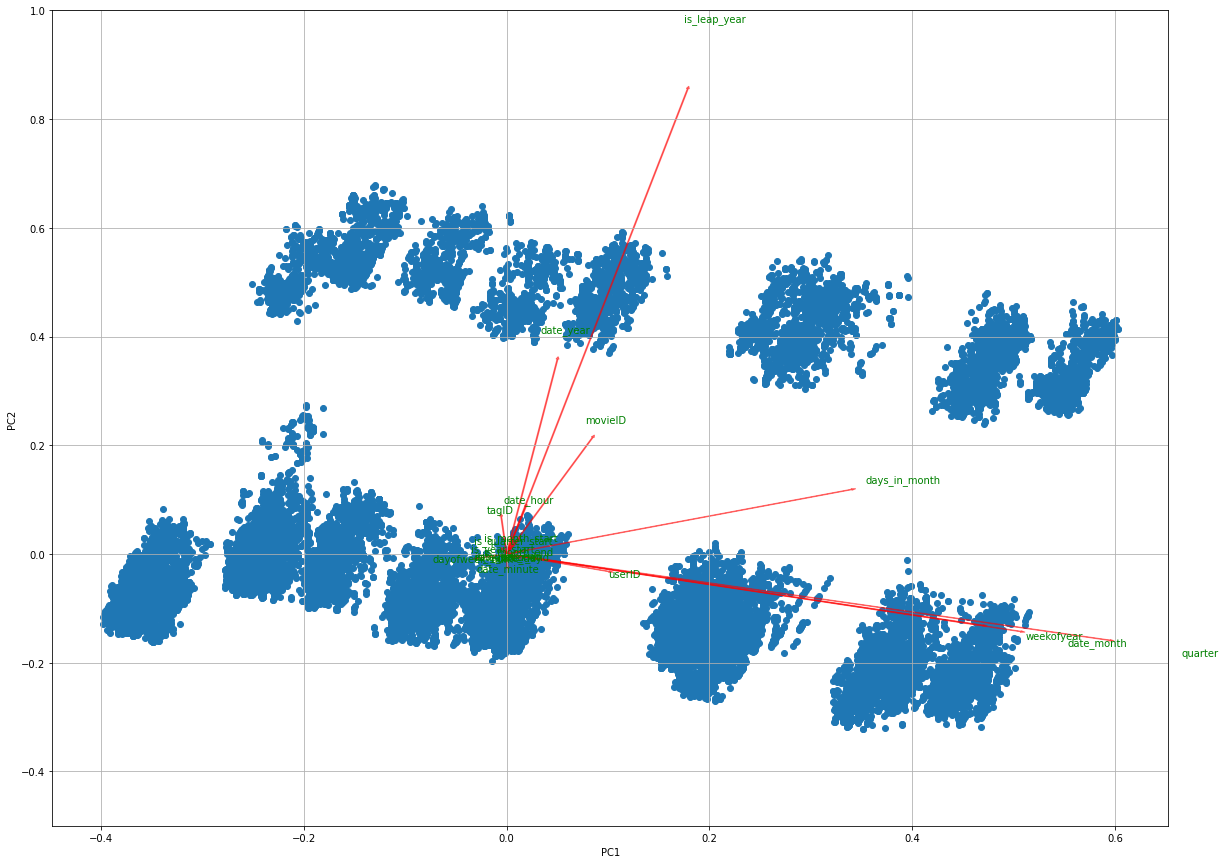

In [ ]:
# plt.xlim(-1,1)
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:
getdf_pca()

0                 1
0    PC0           quarter
1    PC1      is_leap_year
2    PC2         date_hour
3    PC3     dayofweek_num
4    PC4         date_hour
5    PC5       date_minute
6    PC6       date_second
7    PC7          date_day
8    PC8            userID
9    PC9             tagID
10  PC10           movieID
11  PC11    is_month_start
12  PC12      is_month_end
13  PC13         date_year
14  PC14  is_quarter_start
15  PC15    is_quarter_end
16  PC16           quarter
17  PC17     is_year_start
18  PC18    is_quarter_end
19  PC19       is_year_end

### Group by USER PCA

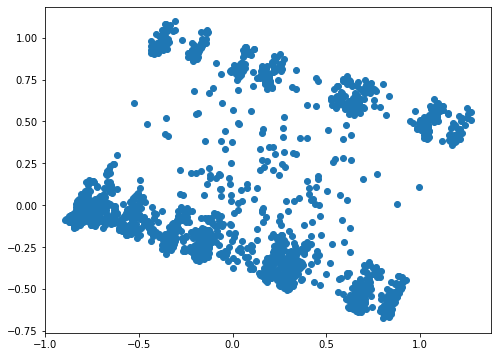

In [ ]:
df_selected = df.filter(regex="[^time_stamp]") # all data
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = df.filter(regex="[^time_stamp]").columns
df_user = df_selected.groupby('userID').mean()
pca = PCA()
vectors = pca.fit_transform(df_user) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

In [ ]:
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

getdf_pca()

0                 1
0    PC0        weekofyear
1    PC1       is_year_end
2    PC2       date_second
3    PC3         date_year
4    PC4           quarter
5    PC5           quarter
6    PC6         date_hour
7    PC7            userID
8    PC8           movieID
9    PC9       date_minute
10  PC10    is_month_start
11  PC11     days_in_month
12  PC12        date_month
13  PC13      is_month_end
14  PC14  is_quarter_start
15  PC15        weekofyear
16  PC16     is_year_start
17  PC17    is_quarter_end
18  PC18     is_year_start

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (15, 10)


plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by User (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

### Group by Item PCA

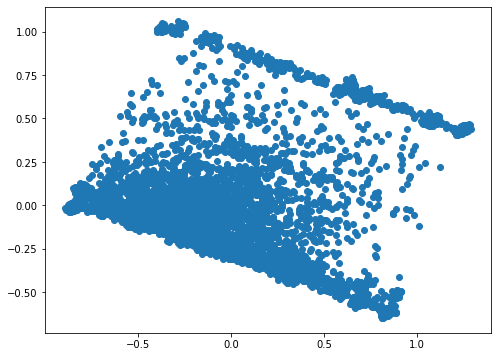

In [ ]:
df_selected = df.filter(regex="[^time_stamp]") # all data
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = df.filter(regex="[^time_stamp]").columns
df_item = df_selected.groupby('movieID').mean()
vectors = PCA(n_components=2).fit_transform(df_item) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

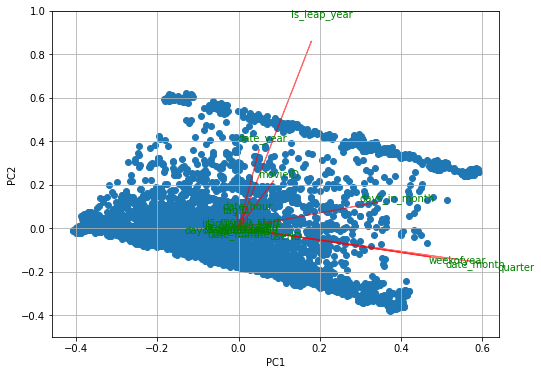

0                 1
0    PC0           quarter
1    PC1      is_leap_year
2    PC2         date_hour
3    PC3     dayofweek_num
4    PC4         date_hour
5    PC5       date_minute
6    PC6       date_second
7    PC7          date_day
8    PC8            userID
9    PC9             tagID
10  PC10           movieID
11  PC11    is_month_start
12  PC12      is_month_end
13  PC13         date_year
14  PC14  is_quarter_start
15  PC15    is_quarter_end
16  PC16           quarter
17  PC17     is_year_start
18  PC18    is_quarter_end
19  PC19       is_year_end

In [ ]:
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

getdf_pca()

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by Item (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

### Group by Tag PCA

In [ ]:
df_selected = df.filter(regex="[^time_stamp]") # all data
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = df.filter(regex="[^time_stamp]").columns
df_tag = df_selected.groupby('tagID').mean()
vectors = PCA(n_components=2).fit_transform(df_tag) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

In [ ]:
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

getdf_pca()

0                 1
0    PC0        weekofyear
1    PC1       is_year_end
2    PC2       date_second
3    PC3         date_year
4    PC4           quarter
5    PC5           quarter
6    PC6         date_hour
7    PC7            userID
8    PC8           movieID
9    PC9       date_minute
10  PC10    is_month_start
11  PC11     days_in_month
12  PC12        date_month
13  PC13      is_month_end
14  PC14  is_quarter_start
15  PC15        weekofyear
16  PC16     is_year_start
17  PC17    is_quarter_end
18  PC18     is_year_start

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by Tag (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Graph


In [ ]:
# test
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
 
G = nx.Graph()
Matrix = np.array(
    [
        [0, 1, 1, 1, 1, 1, 0, 0],  # a
        [0, 0, 1, 0, 1, 0, 0, 0],  # b
        [0, 0, 0, 1, 0, 0, 0, 0],  # c
        [0, 0, 0, 0, 1, 0, 0, 0],  # d
        [0, 0, 0, 0, 0, 1, 0, 0],  # e
        [0, 0, 1, 0, 0, 0, 1, 1],  # f
        [0, 0, 0, 0, 0, 1, 0, 1],  # g
        [0, 0, 0, 0, 0, 1, 1, 0]  # h
    ]
)
pos = nx.layout.spring_layout(G)
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
        G.add_edge(i, j)
 
nx.draw(G)
plt.show()

## use centroids of Tagging + all time-series data pca

In [ ]:
dis_l1 = (pow(centroids[:,0],2)+pow(centroids[:,1],2))
dis_l1

array([0.63241715, 0.02248993, 0.62930406, 0.2478305 , 1.23416511,
       0.98672805, 0.4745856 , 0.05654733, 0.68729706, 0.65283004,
       0.04274901, 0.83148844, 0.24738381, 0.19822052, 1.44291516,
       0.10012788, 0.91722114, 0.33598854, 0.94125638, 0.66908064,
       0.05475995, 0.52203415, 0.02484719, 0.04968762, 0.14452386])

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

### Scaled

In [ ]:
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

0         1         2   ...        22        23        24
0  0.000000  0.369166  0.591543  ...  0.448504  0.368090  0.536075
1  0.253450  0.000000  0.131862  ...  0.075940  0.002965  0.043233
2  0.870731  0.282713  0.000000  ...  0.819554  0.212907  0.072073
3  0.602848  0.108678  0.024629  ...  0.383858  0.079961  0.005995
4  0.420732  0.874011  0.900632  ...  0.839171  0.880744  0.878246

[5 rows x 25 columns]

In [ ]:
df_dis.describe()

0          1          2   ...         22         23         24
count  25.000000  25.000000  25.000000  ...  25.000000  25.000000  25.000000
mean    0.397691   0.294786   0.323785  ...   0.442925   0.282879   0.287369
std     0.343303   0.289991   0.296101  ...   0.320593   0.290115   0.294433
min     0.000000   0.000000   0.000000  ...   0.000000   0.000000   0.000000
25%     0.088336   0.058072   0.045154  ...   0.137225   0.067023   0.043233
50%     0.326126   0.272236   0.239837  ...   0.383858   0.212907   0.134776
75%     0.602848   0.403996   0.542890  ...   0.758300   0.409092   0.473444
max     1.000000   1.000000   1.000000  ...   1.000000   1.000000   1.000000

[8 rows x 25 columns]

In [ ]:
df_dis.describe().loc['75%',:].mean()

0.5742124276703159

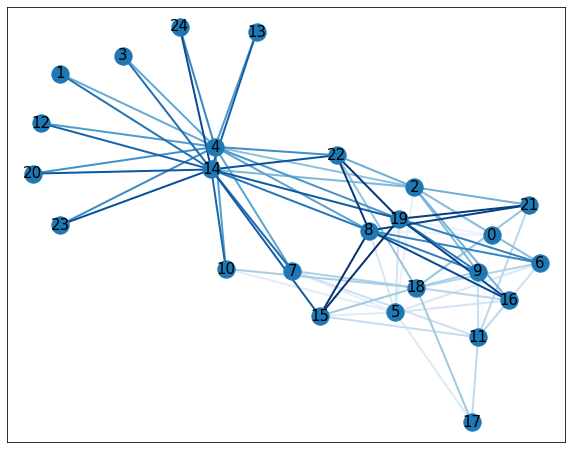

75


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

### UnScaled 

In [ ]:
df_dis.describe().loc['75%',:].mean()

1.46120866498082

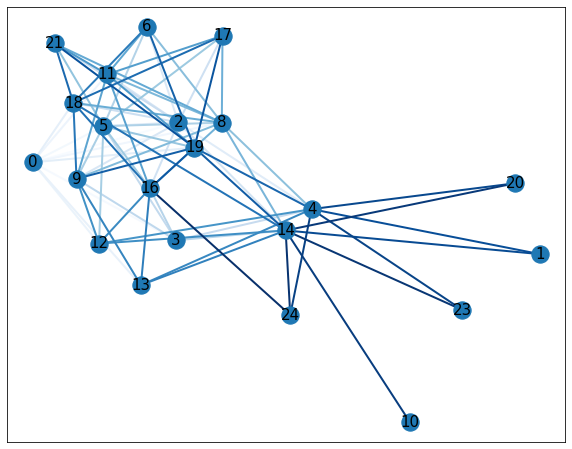

78


In [ ]:
random.seed(0)        
np.random.seed(0)
minDis = 1.4612
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)
pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

## use Tagging+all tiem Group by User PCA
Scaled

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

In [ ]:
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

0         1         2   ...        22        23        24
0  0.000000  0.399617  0.786301  ...  0.873321  0.825601  0.505580
1  0.296886  0.000000  0.255277  ...  0.484178  0.286312  0.115493
2  0.340303  0.148711  0.000000  ...  0.147727  0.033517  0.061387
3  0.383249  0.061532  0.053725  ...  0.229395  0.072760  0.065221
4  0.849788  0.644213  0.341341  ...  0.000095  0.107261  0.713534

[5 rows x 25 columns]

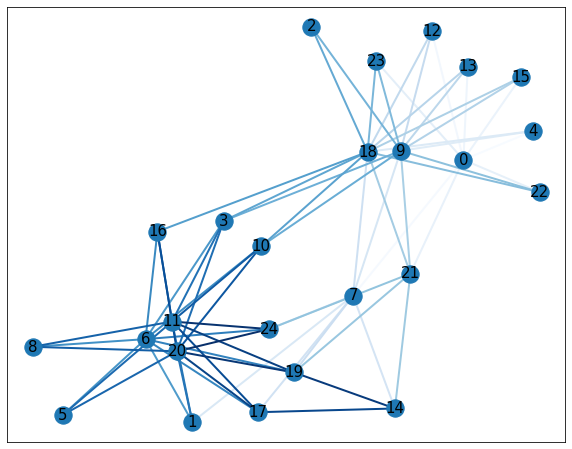

68


In [ ]:
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

## use Tagging+all tiem Group by Item PCA
Scaled

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

In [ ]:
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

0         1         2   ...        22        23        24
0  0.000000  0.924578  1.000000  ...  1.000000  0.718936  1.000000
1  0.279639  0.000000  0.155962  ...  0.041748  0.079629  0.041179
2  0.702159  0.362076  0.000000  ...  0.189088  0.503574  0.093166
3  0.326603  0.122598  0.282002  ...  0.064285  0.376322  0.172620
4  0.235268  0.565978  0.419723  ...  0.677173  0.234586  0.467601

[5 rows x 25 columns]

In [ ]:
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

37


## use Tagging+all tiem Group by Tag PCA
Scaled

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

In [ ]:
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

0         1         2   ...        22        23        24
0  0.000000  0.370779  0.617304  ...  0.657869  0.018191  0.016073
1  0.451024  0.000000  0.298627  ...  0.538577  0.529886  0.368502
2  0.668598  0.265895  0.000000  ...  0.042721  0.636565  0.644583
3  0.165015  0.061851  0.384977  ...  0.545583  0.211616  0.102091
4  0.534449  1.000000  0.559955  ...  0.392759  0.475631  0.694747

[5 rows x 25 columns]

In [ ]:
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

41


# LSH
https://www.learndatasci.com/tutorials/building-recommendation-engine-locality-sensitive-hashing-lsh-python/

https://onestopdataanalysis.com/lsh/


In [ ]:
pip install datasketch

     |████████████████████████████████| 67 kB 4.5 MB/s 


## PCA-USER + LSH

In [ ]:
df_user

movieID     tagID  ...  is_year_end  is_leap_year
userID                        ...                           
0.000000  0.005405  0.320002  ...          0.0      0.000000
0.000042  0.064825  0.318429  ...          0.0      0.000000
0.000728  0.081906  0.259923  ...          0.0      0.000000
0.001329  0.734373  0.005566  ...          0.0      0.000000
0.001399  0.417303  0.347410  ...          0.0      0.000000
...            ...       ...  ...          ...           ...
0.999482  0.174055  0.242166  ...          0.0      0.000000
0.999650  0.208173  0.585987  ...          0.0      0.976562
0.999874  0.697784  0.311713  ...          0.0      0.000000
0.999930  0.058123  0.169954  ...          0.0      0.000000
1.000000  0.060108  0.142180  ...          0.0      0.000000

[2113 rows x 19 columns]

In [ ]:
# Method 1 把tagging-PCA 结果group

In [ ]:
vectors_1d = PCA(n_components=1).fit_transform(df_selected)
df_user_1d = pd.concat([df.filter(regex="[^time_stamp]").loc[:,'userID'],pd.DataFrame(vectors_1d)],axis=1)

In [ ]:
df_user_lst = pd.DataFrame(df_user_1d.groupby('userID').apply(lambda x: list(x[0])))
df_user_lst['tag_num'] = df_user_lst[0].apply(len)
df_user_lst[df_user_lst.tag_num>2]

0  tag_num
userID                                                            
127     [0.43703809454894255, 0.4335724797796725, 0.43...       23
190     [-0.045189717425882174, -0.044055620195745576,...       26
325     [-0.4319548865480935, 0.3567702853601463, -0.0...        5
383     [0.989486860731099, 0.9898309391580569, 0.8174...        4
477     [0.4464709689351199, 0.446470647628355, 0.4463...       26
...                                                   ...      ...
71420   [-0.11863773063393639, -0.11918003643387194, -...       56
71478   [-0.7498674851406913, -0.7660245891539287, 0.0...        3
71497   [0.5514569995000097, 0.5511110666836331, 0.530...       41
71509   [0.6296848180632915, 0.5133859013214613, 0.629...      128
71534   [1.0410123390311823, 1.0434811420266836, 1.043...       37

[984 rows x 2 columns]

In [ ]:
    start_time = time.time()
    minhash = []
    
    for pcas in df_user_lst[0]:
        pcas = str(pcas)
        m = MinHash(num_perm=32)
        for s in pcas:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=32)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))

In [ ]:
# Method 2 把User-PCA 2D结果代入minHash
m = MinHash()
data1 = [ 0.64816147, -0.54253993]
for d in data1:
  m.update(str(d).encode('utf8'))

In [ ]:
vectors

array([[ 0.77890402, -0.39060472],
       [-0.23016071, -0.14797051],
       [ 0.43704139, -0.29322769],
       ...,
       [ 1.05479409, -0.42498046],
       [ 1.07457846, -0.33916029],
       [ 1.08325624, -0.3532431 ]])

In [ ]:
    start_time = time.time()
    minhash = []
    
    for pcas in vectors:
        m = MinHash(num_perm=32)
        for s in pcas:
            m.update(str(s).encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=32)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))

It took 28.41197967529297 seconds to build forest.


In [ ]:
m.hashvalues

array([ 170058183,  231972810,   13184479,   31312792,  132721297,
        162003033,  223352304,  159809555,   56920750,  650229806,
         86101458,  267848141,  589979148,   60243568,  185660087,
        716560562,  303782223,  518718070,   75816273,  345530959,
        777096236,  171205302,  377605013,  225330139,  478898225,
        209569695,    3651271, 1313042232,   23909840,  146302257,
        614910999,   73081062], dtype=uint64)

In [ ]:
    start_time = time.time()
    
    query = vectors[2]
    m = MinHash(num_perm=32)
    for s in query:
        m.update(str(s).encode('utf8'))
        
    idx_array = np.array(forest.query(m, 10))
    if len(idx_array) == 0: 
      print("if your query is empty, return none")
    
    print(idx_array)

    # result = database.iloc[idx_array]['title']
    
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    

[2]
It took 0.002424478530883789 seconds to query forest.


## MinHash Example
http://ekzhu.com/datasketch/minhash.html

In [ ]:
from datasketch import MinHash

data1 = ['minhash', 'is', 'a', 'probabilistic', 'data', 'structure', 'for',
        'estimating', 'the', 'similarity', 'between', 'datasets']
data2 = ['minhash', 'is', 'a', 'probability', 'data', 'structure', 'for',
        'estimating', 'the', 'similarity', 'between', 'documents']

m1, m2 = MinHash(), MinHash()
for d in data1:
    m1.update(d.encode('utf8'))
for d in data2:
    m2.update(d.encode('utf8'))
print("Estimated Jaccard for data1 and data2 is", m1.jaccard(m2))

s1 = set(data1)
s2 = set(data2)
actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
print("Actual Jaccard for data1 and data2 is", actual_jaccard)

Estimated Jaccard for data1 and data2 is 0.7109375
Actual Jaccard for data1 and data2 is 0.7142857142857143


In [ ]:
m1.hashfunc

<function datasketch.hashfunc.sha1_hash32>

In [ ]:
m1.hashvalues

array([ 297616339,  279951299,  113505080,  311917730,    1735256,
        278730948,  249258812,  306660385,  386953741,  423518424,
        120511132,  607298570,  490287863,  115094987,  290874010,
         58384851,   82568189,  483072302,  312640790,   86174351,
        198731659,  788039411,   54507159,  828911042,   93863906,
         16071831,  260431759,  316407020,  261463262, 1524825895,
        648376383,  206326676,  176707072,   18714679,  478567185,
        180270267,   89979232,  111646838,  240537181,  342142234,
        620096571, 1407834531,  330961037,  663383944, 1105899070,
        181581527,  132285593,  375422674, 1436377075,  484486034,
        252946215,   87331021,  374968398,  968098446,   72863372,
        484842735,  179471924,  672911886,   14648640,  656664915,
        417888415,  271335895,   10055390,   48164330,  430379235,
        622471011,  822143071,  365346353,  210165943,  633147285,
        415249929,  133327723,  258658760,  272079305,  134604

## LSH for cosinesimilarity

https://www.kaggle.com/paulrohan2020/location-sensitive-hashing-for-cosine-similarity/data

In [ ]:
vector_1 = [3, 45, 7, 2]
vector_2 = [2, 54, 13, 15]
np.dot(vector_1, vector_2),np.array(vector_1) * np.array(vector_2)

(2557, array([   6, 2430,   91,   30]))

In [ ]:
np.sum(np.array(vector_1) * np.array(vector_2))

2557

In [ ]:
np.linalg.norm([3,4])

5.0

In [ ]:
np.linalg.norm(np.array(vector_1) * np.array(vector_2))

2431.8957625687826

In [ ]:
cosine_similarity_2 = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
print(cosine_similarity_2)

0.9722842517123499


https://tostr.pl/blog/locality-sensitive-hashing-for-angular-distance-in-python/

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b)))

def angular_distance(a, b):
    return np.arccos(cosine_similarity(a, b)) / np.pi

class AngularLSHIndex(object):
    
    def __init__(self, dim, hash_no):
        # dim - dimensionality of used vectors
        self.dim = dim
        self.hash_no = hash_no
        # draw hash_no random vectors
        self.hash_vecs = np.random.uniform(low=-1.0, size=(hash_no, dim))
        # standard python dictionary will be our "index"
        # for small hash_no values this could be a list
        self.db = {}
    

    def get_hash_key(self, vec):
        # compute dot product of all hash vectors
        # and check the sign
        sv = vec.dot(self.hash_vecs.T) > 0
        # binary vector to byte string
        return np.packbits(sv).tostring()

    def add(self, vec):
        k = self.get_hash_key(vec)
        self.db.setdefault(k, []).append(vec)
    
    def get(self, vec):
        k = self.get_hash_key(vec)
        return self.db.get(k, [])

        
def dot_binary(vec, bin_arr):
    return np.apply_along_axis(
        lambda x: np.sum(vec[x]) - np.sum(vec[~x]),
        1,
        bin_arr
        )

## NIPS Papers dataset
https://www.kaggle.com/benhamner/nips-papers?select=papers.csv

https://www.kaggle.com/benhamner/exploring-the-nips-papers

In [ ]:
import numpy as np
import pandas as pd
import re
import time
from datasketch import MinHash, MinHashLSHForest

In [ ]:
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

In [ ]:
text = 'The devil went down to Georgia'
print('The shingles (tokens) are:', preprocess(text))

The shingles (tokens) are: ['the', 'devil', 'went', 'down', 'to', 'georgia']


In [ ]:
#Number of Permutations
permutations = 128

#Number of Recommendations to return
num_recommendations = 1

In [ ]:
def get_forest(data, perms):
    start_time = time.time()
    
    minhash = []
    
    for text in data['text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=perms)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))
    
    return forest

In [ ]:
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    
    result = database.iloc[idx_array]['title']
    
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    
    return result

In [ ]:
db = pd.read_csv('/content/drive/MyDrive/PY/TimeSeriesRecSys/paper_dataset/papers.csv')
db['text'] = db['title'] + ' ' + db['abstract']
forest = get_forest(db, permutations)

It took 19.092541933059692 seconds to build forest.


In [ ]:
num_recommendations = 5
title = 'Using a neural net to instantiate a deformable model'
result = predict(title, db, permutations, num_recommendations, forest)
print('\n Top Recommendation(s) is(are) \n', result)

It took 0.011797666549682617 seconds to query forest.

 Top Recommendation(s) is(are) 
 995     Neural Network Weight Matrix Synthesis Using O...
5       Using a neural net to instantiate a deformable...
5191    A Self-Organizing Integrated Segmentation and ...
2069    Analytic Solutions to the Formation of Feature...
2457    Inferring Neural Firing Rates from Spike Train...
Name: title, dtype: object


# AE

In [ ]:
vectors

array([[ 0.64816165, -0.54254075,  0.43390561, ..., -0.01808777,
         0.0044388 ,  0.00407495],
       [-0.30471315, -0.16870398, -0.51245992, ..., -0.02335   ,
        -0.00237591,  0.00583273],
       [ 0.31986092, -0.35968197, -0.47924914, ..., -0.00350239,
        -0.00110114,  0.00302308],
       ...,
       [-0.13978504, -0.17542926,  0.56723269, ...,  0.02802297,
         0.00094243, -0.00681024],
       [ 0.63543054, -0.56058921,  0.3278742 , ..., -0.01926087,
         0.00555403,  0.00224709],
       [ 0.84964527, -0.58998468, -0.38528483, ...,  0.01120511,
        -0.0018659 , -0.00274716]])

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LSTM, RepeatVector
from keras.models import Model
from keras import regularizers

In [ ]:
input_num = Input(shape=(19,))
encoded = Dense(64, activation='relu')(input_num)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(19, activation='softmax')(decoded)

Model_autoencoder_DL = Model(input_num, decoded)
Model_encoder = Model(input_num, encoded)

encoded_input = Input(shape=(32,))
#中间层无法引用autoencoder中的层，或者构建时的参数，所以根据模型结构手动构造输入层
# retrieve the last layer of the autoencoder model
decoder_layer = Model_autoencoder_DL.layers[-1]
#直接引用autoencoder最后一层
# create the decoder model
Model_decoder = Model(encoded_input, decoder_layer(encoded_input))


Model_autoencoder_DL.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [ ]:
Model_autoencoder_DL.fit(df_user.values, df_user.values,
                epochs=100,
                batch_size=32,
                # shuffle=True,
                )

Epoch 1/100
67/67 [==============================] - 1s 1ms/step - loss: 1.3684
Epoch 2/100
67/67 [==============================] - 0s 1ms/step - loss: 0.8076
Epoch 3/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7743
Epoch 4/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7536
Epoch 5/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7562
Epoch 6/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7460
Epoch 7/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7502
Epoch 8/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7479
Epoch 9/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7408
Epoch 10/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7450
Epoch 11/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7326
Epoch 12/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7272
Epoch 13/100
67/67 [=================

In [ ]:
Model_encoder.predict(df_user.values[:1])

array([[0.        , 0.        , 0.        , 0.8751362 , 0.21657875,
        0.        , 0.4115395 , 0.07865485, 0.        , 0.        ,
        0.52489686, 0.6915984 , 1.2215767 , 0.8368807 , 0.        ,
        0.        , 0.25561067, 0.4786983 , 0.21155459, 0.        ,
        0.        , 0.57903266, 0.0768693 , 0.31829506, 0.25254583,
        0.        , 0.5024194 , 0.40149716, 0.41169012, 0.        ,
        0.24791877, 0.4858034 ]], dtype=float32)